<h1 align="center">Física Computacional.</h1>
<h1 align="center">Semestre 2025-4</h1>

<h2>Sergio A. Alcalá Corona </h2> 

---
### Rodrigo Vega Vilchis
### Daniel Rojo Mata
---

<h1 align="center">Programación para la física computacional</h1> 

## Práctica 3.  Metodos de Integración y Diferenciación numérica.

### Programación básica para la física
### Alumno: Rivas Rodriguez Luis Enrique
---

### **1.- Regla del Trapecio**:

$\;$

#### **## 1. Regla del Trapecio El archivo `velocidades.txt` (adjunto) contiene dos columnas de números. La primera representa el tiempo $t$ en segundos y la segunda la $x$-velocidad en metros por segundo de una partícula, medida una vez por segundo desde el tiempo $t = 0$ hasta $t = 100$.  

### Las primeras líneas se ven así:

### Escribe un programa para hacer lo siguiente:
<pre>
0   0
1   0.069478
2   0.137694
3   0.204332
4   0.269083
5   0.331656
</pre>



#### **(a)** Lee los datos y, usando la regla del trapecio, calcula a partir de ellos la distancia aproximada recorrida por la partícula en la dirección $x$ como una función del tiempo.

#### **(b)** Extiende tu programa para hacer una grafica que muestre, en el mismo gráfico, tanto la curva de velocidad original como la distancia recorrida como una función del tiempo.


8.218924000000003


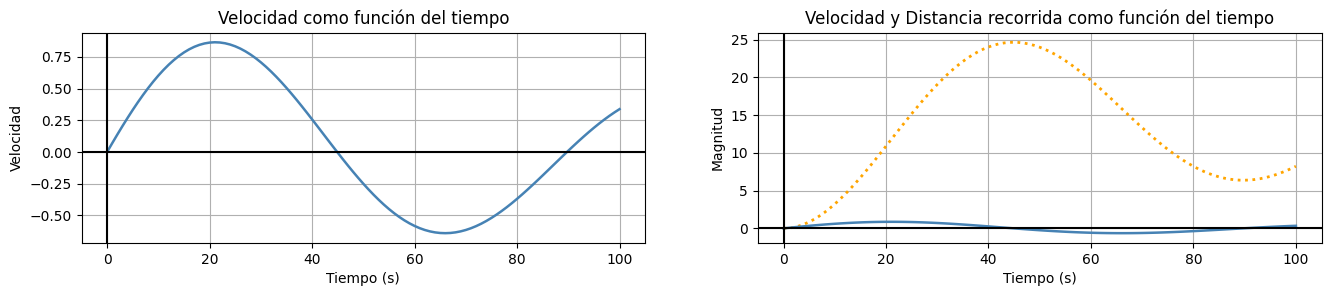

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
data=np.loadtxt("velocidades.txt", float)
x=data[:,0]
y=data[:,1]

def trapecio(x, y):
    distancia=[0.0]
    for i in range(1, len(x)):
        h = x[i] - x[i - 1]
        s = 0.5 * (y[i] + y[i - 1]) * h
        distancia.append(distancia[-1]+s)    
    return distancia
d=trapecio(x,y)
print(d[-1])
plt.figure(figsize=(16, 6))
plt.subplot(2,2,2)
plt.plot(x, d, color='orange', ls=':',lw=2,)
plt.plot(x, y, label='Velocidad (m/s)', color='steelblue', lw=1.8)
plt.title("Velocidad y Distancia recorrida como función del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Magnitud")
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()

plt.subplot(2,2,1)
plt.plot(x, y, label='Velocidad (m/s)', color='steelblue', lw=1.8)
plt.title("Velocidad como función del tiempo")
plt.xlabel("Tiempo (s)")
plt.ylabel("Velocidad")
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()

#### **2.- Integración Numérica** 

#### **a)** Escribe un programa para calcular un valor aproximado para la integral:

$$
\int_0^2 (x^4 - 2x + 1) \, dx,
$$
#### utilizando tanto la **regla del trapecio**, como la **regla de Simpson** con 10 divisiones.
#### **(b)** Ejecuta el programa y compara tu resultado con el valor correcto conocido de 4.4. ¿Cuál es el error en tu cálculo?

El resultado por el método de trapecio es 4.50656
El resultado por el método de Simpson es 3.22496
El error entre el valor real conocido 4.4 con el del método de trapecio es -0.10655999999999999
El error entre el valor real conocido 4.4 con el del método de Simpson es 1.1750400000000005


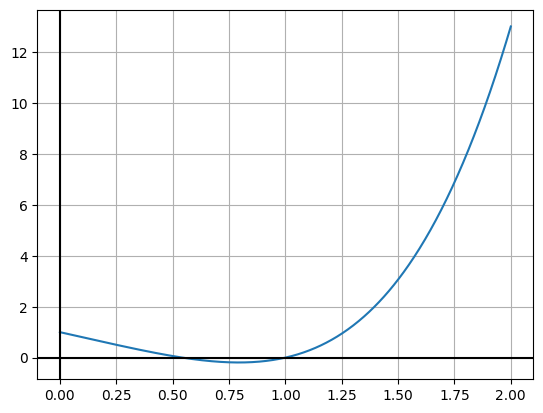

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
def fa(x):
    return x**4-2*x+1
X = np.linspace(0,2,1000)
Fx = fa(X)
plt.plot(X,Fx)
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()
b=2
a=0
N=10
def MetodTrapecio(f,a,b,N):

    s = 0.0
    h = (b-a)/N

    s = s + (f(a)+f(b))/2

    for k in range(1,N):
        s = s + f(a+k*h)

    s = h*s

    return float(s)


def MetodSimpson(f,a,b,N):

    s = 0.0
    h = (b-a)/N

    s = s + (f(a)+f(b))

    for k in np.arange(1,N/2+1):
        s = s + 4*f(a+(2*(k-1))*h)

    for k in np.arange(1,N/2):
        s = s + 2*f(a+(2*k*h))
    
    s = (h/3)*s

    return float(s)
print("El resultado por el método de trapecio es" ,MetodTrapecio(fa,a,b,N))
print("El resultado por el método de Simpson es" ,MetodSimpson(fa,a,b,N))
Rreal=4.4
print("El error entre el valor real conocido", Rreal, "con el del método de trapecio es" ,(Rreal - MetodTrapecio(fa,a,b,N)))
print("El error entre el valor real conocido", Rreal, "con el del método de Simpson es" ,(Rreal - MetodSimpson(fa,a,b,N)))

#### **(c)** Modifica el programa para utilizar 100 divisiones y luego 1000. ¿Cómo mejora el resultado? ¿Cómo se comparan los resultados entre ambas reglas al usar la misma cantidad de divisiones?

In [6]:
print("El resultado por el método de trapecio con 100 puntos es" ,MetodTrapecio(fa,a,b,100))
print("El resultado por el método de Simpson con 100 puntos es" ,MetodSimpson(fa,a,b,100))
Rreal=4.4
print("El error entre el valor real conocido", Rreal, "con el del método de trapecio con 100 puntos es" ,abs(Rreal - MetodTrapecio(fa,a,b,100)))
print("El error entre el valor real conocido", Rreal, "con el del método de Simpson con 100 puntos es" ,abs(Rreal - MetodSimpson(fa,a,b,100)))

El resultado por el método de trapecio con 100 puntos es 4.401066656
El resultado por el método de Simpson con 100 puntos es 4.244266496
El error entre el valor real conocido 4.4 con el del método de trapecio con 100 puntos es 0.0010666559999998881
El error entre el valor real conocido 4.4 con el del método de Simpson con 100 puntos es 0.15573350400000052


In [7]:
print("El resultado por el método de trapecio con 1000 puntos es" ,MetodTrapecio(fa,a,b,1000))
print("El resultado por el método de Simpson con 1000 puntos es" ,MetodSimpson(fa,a,b,1000))
Rreal=4.4
print("El error entre el valor real conocido", Rreal, "con el del método de trapecio con 1000 puntos es" ,abs(Rreal - MetodTrapecio(fa,a,b,1000)))
print("El error entre el valor real conocido", Rreal, "con el del método de Simpson con 1000 puntos es" ,abs(Rreal - MetodSimpson(fa,a,b,1000)))

El resultado por el método de trapecio con 1000 puntos es 4.400010666665601
El resultado por el método de Simpson con 1000 puntos es 4.384042666649601
El error entre el valor real conocido 4.4 con el del método de trapecio con 1000 puntos es 1.0666665600567171e-05
El error entre el valor real conocido 4.4 con el del método de Simpson con 1000 puntos es 0.01595733335039906


### 3. El límite de difracción de un telescopio

Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de la luz en nuestros telescopios. La luz de las estrellas puede considerarse efectivamente como si proviniera de una fuente puntual en el infinito. 

Cuando dicha luz, con una longitud de onda $\lambda$, pasa a través de la apertura circular de un telescopio (que supondremos que tiene un radio unitario) y es enfocada por el telescopio en el plano focal, no produce un solo punto, sino un patrón de difracción circular que consta de un punto central rodeado por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción está dada por:

$$
I(r) = \left( \frac{J_1(kr)}{kr} \right)^2
$$

donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k = \frac{2\pi}{\lambda}$, y $J_1(x)$ es una función de Bessel. Las funciones de Bessel $J_m(x)$ están definidas por:

$$
J_m(x) = \frac{1}{\pi} \int_0^{\pi} \cos(m\theta - x \sin \theta) \, d\theta
$$

donde $m$ es un entero no negativo y $x \geq 0$.

**(a)** Escribe una función `J(m, x)` que calcule el valor de $J_m(x)$ usando la regla de Simpson con $N = 1000$ puntos. Utiliza dicha función en un programa para graficar, en un solo gráfico, las funciones de Bessel $J_0$, $J_1$ y $J_2$ como función de $x$ (de $x = 0$ a $x = 20$).


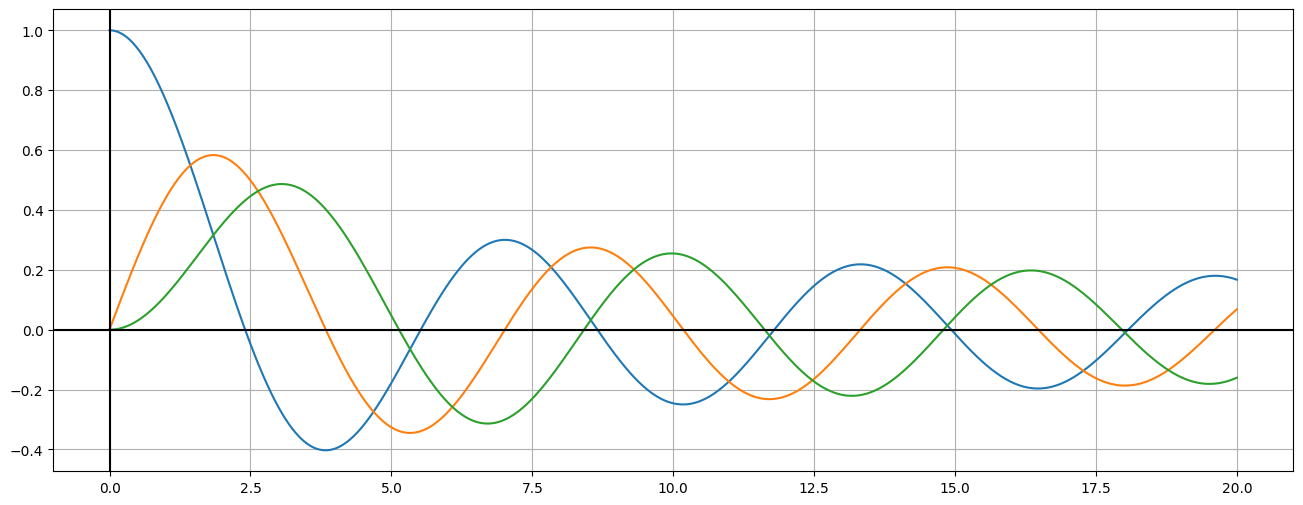

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
def MetodSimpson(f,a,b,N):
    if N%2!=0:
        raise ValueError ("N debe ser par ara aplicar la regla de simpson correctamente")

    s = 0.0
    h = (b-a)/N

    s = s + (f(a)+f(b))

    for k in np.arange(1,N/2+1):
        s = s + 4*f(a+(2*(k-1))*h)

    for k in np.arange(1,N/2):
        s = s + 2*f(a+(2*k*h))
    
    s = (h/3)*s

    return s


def Jmx(m,xn):
    def Int(theta):
        return np.cos(m*theta-xn*np.sin(theta))
    return (1/np.pi)*MetodSimpson(Int,0,np.pi,1000)
xn=np.linspace(0,20,1000)
J_0=[Jmx(0,x) for x in xn]
J_1=[Jmx(1,x) for x in xn]
J_2=[Jmx(2,x) for x in xn]
plt.figure(figsize=(16,6))
plt.plot(xn,J_0)
plt.plot(xn,J_1)
plt.plot(xn,J_2)
plt.axhline(y = 0.0, xmin = 0.0, color = 'black')
plt.axvline(x = 0.0, ymin = 0.0, color = 'black')
plt.grid()
# 

#### **(b)** Compara tus resultados con los proporcionados con la biblioteca de scipy que implementa la regla de Simpson.

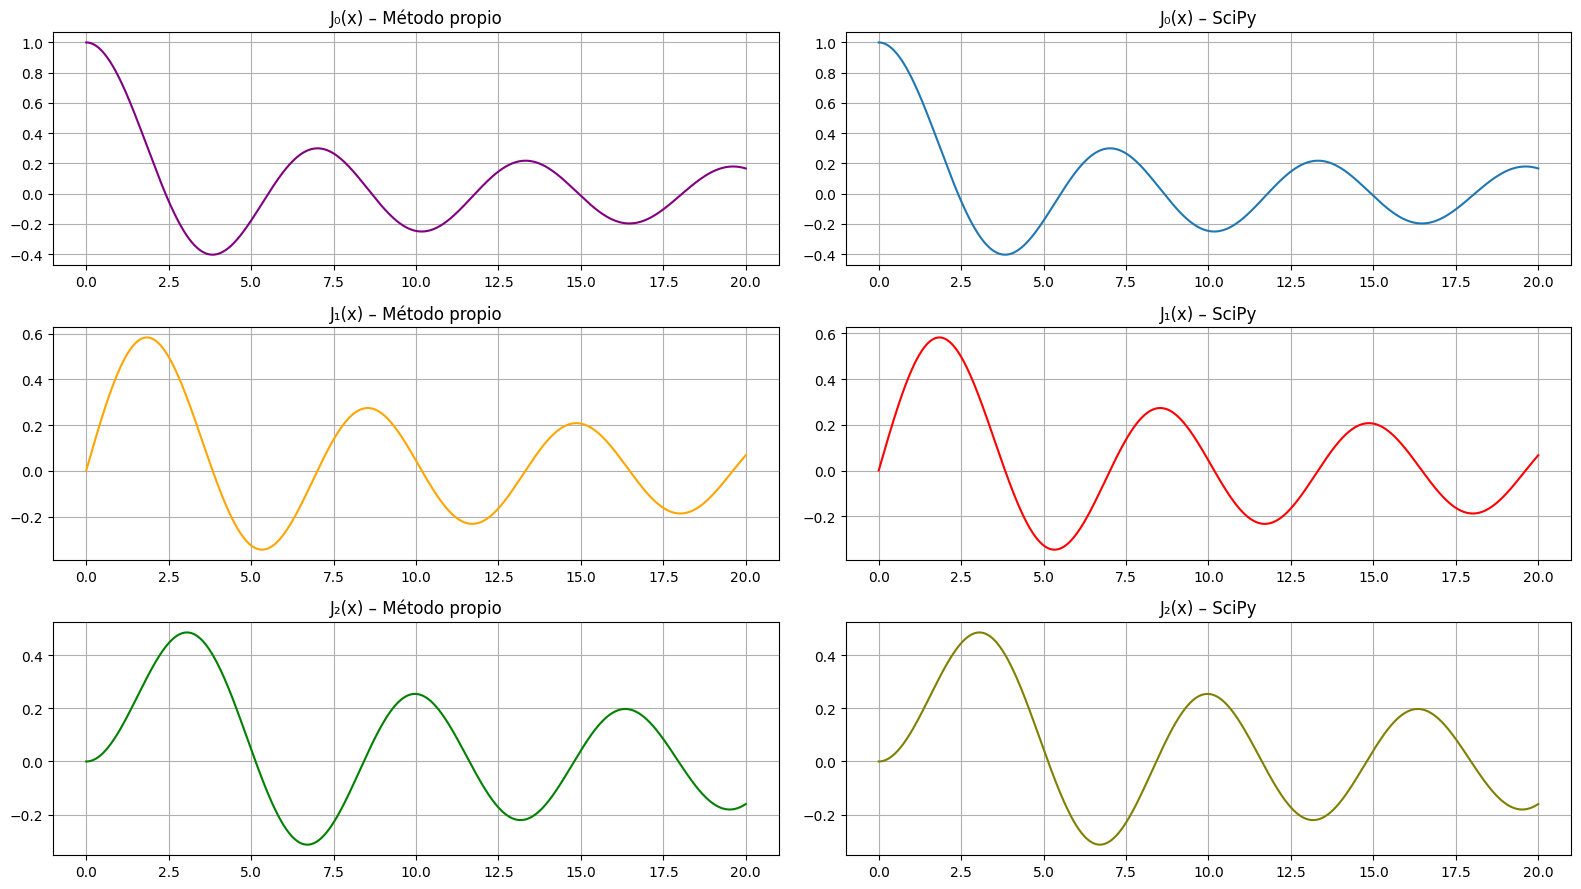

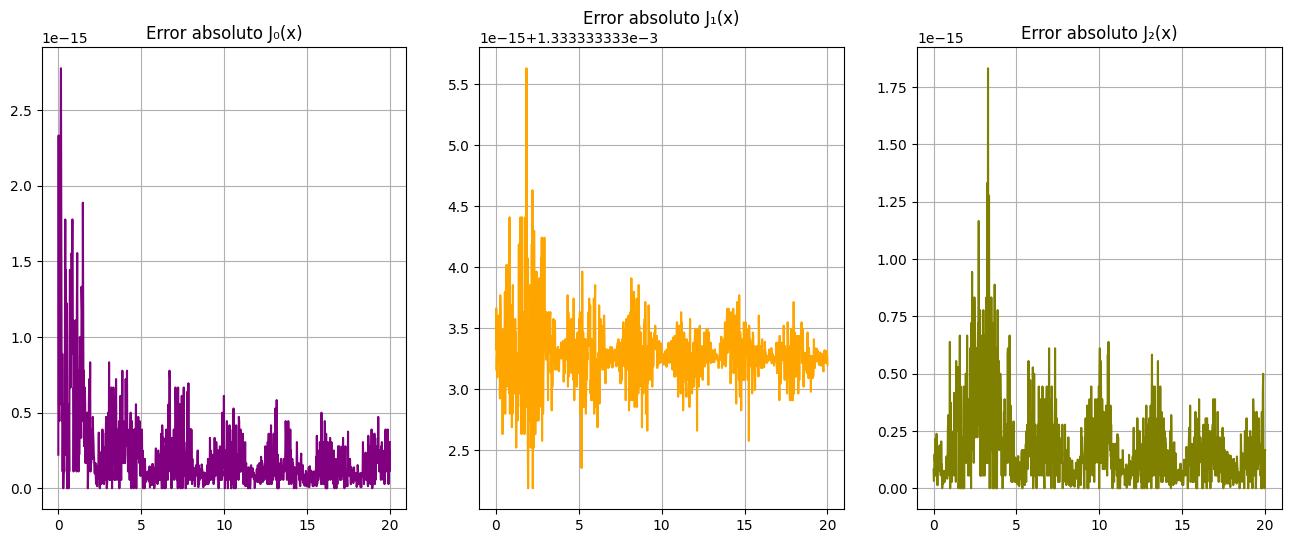

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt
import scipy as sp

def MetodSimpson(f, a, b, N):
    if N % 2 != 0:
        raise ValueError("N debe ser par para aplicar la regla de simpson correctamente")

    s = 0.0
    h = (b - a) / N
    s += f(a) + f(b)

    for k in np.arange(1, N//2 + 1):
        s += 4 * f(a + (2 * (k - 1)) * h)
    for k in np.arange(1, N//2):
        s += 2 * f(a + (2 * k * h))

    return (h / 3) * s

def Jmx(m, xn):
    def Int(theta):
        return np.cos(m * theta - xn * np.sin(theta))
    return (1 / np.pi) * MetodSimpson(Int, 0, np.pi, 1000)

def Jscipy(m, xn, N=1000):
    theta = np.linspace(0, np.pi, N + 1)
    Int_theta = np.cos(m * theta - xn * np.sin(theta))
    Intscipy = sp.integrate.simpson(Int_theta, theta)
    return (1 / np.pi) * Intscipy
xn = np.linspace(0, 20, 1000)

J0_propios = [Jmx(0, x) for x in xn]
J1_propios = [Jmx(1, x) for x in xn]
J2_propios = [Jmx(2, x) for x in xn]

J0_scipy = [Jscipy(0, x) for x in xn]
J1_scipy = [Jscipy(1, x) for x in xn]
J2_scipy = [Jscipy(2, x) for x in xn]
err0 = [abs(a - b) for a, b in zip(J0_propios, J0_scipy)]
err1 = [abs(a - b) for a, b in zip(J1_propios, J1_scipy)]
err2 = [abs(a - b) for a, b in zip(J2_propios, J2_scipy)]

plt.figure(figsize=(16, 9))
plt.subplot(3, 2, 1)
plt.plot(xn, J0_propios,color ='purple')
plt.title('J₀(x) – Método propio')
plt.grid()

plt.subplot(3, 2, 2)
plt.plot(xn, J0_scipy)
plt.title('J₀(x) – SciPy')
plt.grid()

plt.subplot(3, 2, 3)
plt.plot(xn, J1_propios, color='orange')
plt.title('J₁(x) – Método propio')
plt.grid()

plt.subplot(3, 2, 4)
plt.plot(xn, J1_scipy, color='red')
plt.title('J₁(x) – SciPy')
plt.grid()

plt.subplot(3, 2, 5)
plt.plot(xn, J2_propios, color= 'green')
plt.title('J₂(x) – Método propio')
plt.grid()

plt.subplot(3, 2, 6)
plt.plot(xn, J2_scipy, color= 'olive')
plt.title('J₂(x) – SciPy')
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
plt.plot(xn, err0, color= 'purple')
plt.title('Error absoluto J₀(x)')
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(xn, err1, color = 'orange')
plt.title('Error absoluto J₁(x)')
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(xn, err2, color='olive')
plt.title('Error absoluto J₂(x)')
plt.grid()



#### **(c)** Escribe un segundo programa que haga una **gráfica de densidad** (*density plot*) de la intensidad del patrón de difracción circular de una fuente de luz puntual con $\lambda = 500\ \text{nm}$, en una región cuadrada del plano focal, usando la fórmula dada anteriormente. Su imagen debe cubrir valores de $r$ desde cero hasta aproximadamente $1\ \mu\text{m}$.,

#### **Hint 1**: Puede resultarte útil saber que $\lim_{x \to 0} \dfrac{J_1(x)}{x} = \dfrac{1}{2}$.

#### **Hint 2**: El punto central en el patrón de difracción es tan brillante que puede resultar difícil ver los anillos que lo rodean en la pantalla de la computadora. Para solucionar esta situación, puedes usar el esquema de color `"hot"`, que funciona bien.

#### Tu gráfica debería verse algo así:
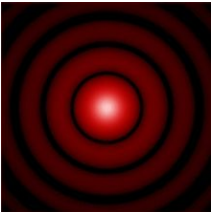


### 4. Capacidad calorífica de un sólido

La teoría de sólidos de Debye dice que la capacidad calorífica de un sólido a una temperatura $T$ está dada por:

$$
C_V = 9V\rho k_B \left( \frac{T}{\theta_D} \right)^3 \int_0^{\theta_D/T} \frac{x^4 e^x}{(e^x - 1)^2} \, dx
$$

donde $V$ es el volumen del sólido, $\rho$ es la densidad numérica de los átomos, $k_B$ es la constante de Boltzmann y $\theta_D$ es la llamada temperatura de Debye, una propiedad de los sólidos que depende de su densidad y la velocidad del sonido.

**(a)** Escribe una función `Cv(T)` que calcule $C_V$ para un valor dado de temperatura, de una muestra que consta de 1000 centímetros cúbicos de aluminio sólido, con densidad numérica de $\rho = 6.022 \times 10^{28}\ \text{m}^{-3}$ y una temperatura de Debye de $\theta_D = 428\ \text{K}$. Utiliza la cuadratura gaussiana para evaluar la integral, con $N = 50$ puntos muestra.

**(b)** Usa tu función para hacer una gráfica de la capacidad calorífica en función de la temperatura desde $T = 5\ \text{K}$ hasta $T = 500\ \text{K}$.


### 5. Atracción gravitacional de una lámina uniforme

Una lámina de metal cuadrada uniforme flota inmóvil en el espacio:


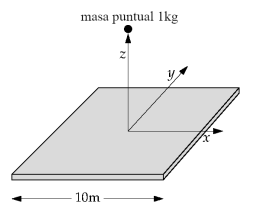



La lámina mide 10 m de lado, tiene un espesor insignificante y una masa de 10 toneladas.

**(a)** Considera la fuerza gravitacional debida a la placa que siente una masa puntual de 1 kg a una distancia $z$ del centro del cuadrado, en dirección perpendicular a la lámina, como se muestra en la figura. Demuestra que la componente de la fuerza a lo largo del eje $z$ es:

$$
F_z = G \sigma z \iint_{-L/2}^{L/2} \frac{dx\,dy}{(x^2 + y^2 + z^2)^{3/2}},
$$

donde $G = 6.674 \times 10^{-11}\ \text{m}^3\,\text{kg}^{-1}\,\text{s}^{-2}$ es la constante gravitacional de Newton y $\sigma$ es la masa por unidad de área de la hoja.


**(b)** Escribe un programa para calcular y graficar la fuerza en función de $z$, desde $z = 0$ hasta $z = 10$ m. Para la integral doble utiliza la **cuadratura gaussiana doble**:

$$
I \approx \sum_{i=1}^{N} \sum_{j=1}^{N} \omega_i \omega_j f(x_i, x_j),
$$

con $100$ puntos de muestra a lo largo de cada eje.

**(c)** Deberías ver una curva suave, excepto en valores muy pequeños de $z$, donde la fuerza debería caer repentinamente a cero. Esta caída no es un efecto real, sino un artefacto de la forma en que hemos realizado el cálculo. Explica brevemente de dónde proviene este artefacto y sugiere una estrategia para **eliminarlo o al menos disminuir su tamaño**.

Este cálculo puede considerarse como un modelo de la atracción gravitacional de una galaxia. La mayor parte de la masa de una galaxia espiral (como nuestra Vía Láctea) se encuentra en un plano o disco delgado que pasa por el centro galáctico, y la atracción gravitacional ejercida por ese plano sobre cuerpos fuera de la galaxia se puede calcular con los métodos que hemos empleado aquí.


### 6. Diferenciación numérica

Crea una función $f(x)$ que devuelva $1 + \dfrac{1}{2} \tanh(2x)$, luego usa **diferencias centrales** para calcular numéricamente la derivada de la función en el intervalo $-2 \leq x \leq 2$.

Después, calcula la derivada **analíticamente** y haz una gráfica con tu resultado numérico y la respuesta analítica en el mismo gráfico. Puede resultar útil graficar la respuesta exacta como **líneas** y la numérica como **puntos**.

*(Hint: usa la función `tanh` del paquete `math`.)*


### 7. Campo eléctrico de una distribución de cargas

Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante. Una forma de hacerlo es calcular primero el **potencial eléctrico** $\phi$ y luego tomar su **gradiente**.

Para una carga puntual $q$ en el origen, el potencial eléctrico a una distancia $r$ del origen es:

$$
\phi = \frac{q}{4\pi \varepsilon_0 r}
$$

y el campo eléctrico es:

$$
\vec{E} = -\nabla \phi.
$$

**(a)** Suponiendo que tienes dos cargas, de $+1$ C y $-1$ C (respectivamente), separadas $10\ \text{cm}$. Calcula el potencial eléctrico resultante en un plano cuadrado de $1\ \text{m} \times 1\ \text{m}$ que rodea las cargas y pasa a través de ellas. Calcula el potencial en puntos espaciados a $1\ \text{cm}$ en una cuadrícula y haz una **visualización en la pantalla del potencial usando un gráfico de densidad**.


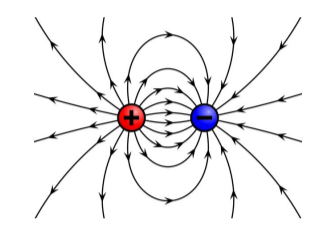


**(b)** Ahora calcula las **derivadas parciales** del potencial con respecto a $x$ y $y$, para encontrar el **campo eléctrico** en el plano $xy$ y realiza una **visualización** de dicho campo.

Lo anterior es un poco más complicado que visualizar el potencial, porque el campo eléctrico tiene **magnitud y dirección**. Una forma de hacerlo podría ser generar **dos gráficos de densidad**: uno para la **magnitud** y otro para la **dirección**. Este último puede usar el esquema de color `"hsv"` en `pylab`, que es un esquema de arcoíris que pasa por todos los colores pero comienza y termina con el mismo tono de rojo, lo que lo hace adecuado para representar cosas como direcciones o ángulos que recorren el círculo completo y terminan donde comenzaron.

Una visualización más sofisticada podría usar el objeto de **flecha** del paquete `visual`, dibujando una cuadrícula de flechas con la **dirección y la longitud** elegidas para representar el campo.


**(c)** Ahora supongamos que tenemos una **distribución continua de carga** sobre un cuadrado de $L \times L$. La densidad de carga en $\text{C}/\text{m}^2$ está dada por:

$$
\sigma(x, y) = q_0 \sin\left(\frac{2\pi x}{L}\right) \sin\left(\frac{2\pi y}{L}\right)
$$

Calcula y visualiza el **campo eléctrico resultante** en puntos espaciados a $1\ \text{cm}$ en un metro cuadrado del plano $xy$, para el caso donde $L = 10\ \text{cm}$. La distribución de carga está **centrada en el medio del área visualizada** y $q_0 = 100\ \text{C}/\text{m}^2$.

Tendrás que realizar una **integral doble** sobre $x$ y $y$, y luego **diferenciar el potencial respecto a la posición** para obtener el campo eléctrico. Elige cualquier método de integración que te parezca apropiado para resolver las integrales.


### 8. Procesamiento de imágenes y STM

Cuando la luz incide sobre una superficie, la cantidad que cae por unidad de área depende no solo de la **intensidad de la luz**, sino también del **ángulo de incidencia**.  
Si la luz forma un ángulo $\theta$ con la normal, solo “ve” una fracción $\cos \theta$ de área por unidad de área real en la superficie:


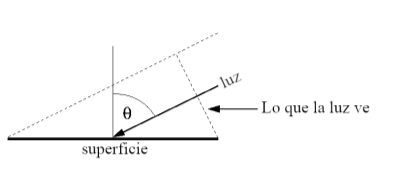

Así, la intensidad de la iluminación es $a \cos \theta$, si $a$ es la intensidad bruta de la luz.  
Esta simple ley física es un elemento central de los **gráficos por computadora en 3D**.  
Nos permite calcular cómo incide la luz sobre objetos tridimensionales y, por tanto, cómo se verán cuando se iluminen desde varios ángulos.

Supongamos, por ejemplo, que miramos la Tierra desde arriba y vemos sus montañas.  
Conocemos la altura de las montañas $w(x, y)$ en función de la posición en el plano, por lo que la ecuación para la superficie de la Tierra es simplemente $z = w(x, y)$, o equivalentemente $w(x, y) - z = 0$.  
El vector normal $\vec{v}$ a la superficie está dado por el gradiente de $w(x, y) - z$:

$$
\vec{v} = \nabla [w(x, y) - z] = \begin{pmatrix} \partial w / \partial x \\ \partial w / \partial y \\ -1 \end{pmatrix}
$$

Ahora supongamos que tenemos **luz entrante** representada por un vector $\vec{a}$ con magnitud igual a la **intensidad de la luz**.  
Entonces el producto escalar entre $\vec{a}$ y $\vec{v}$ es:

$$
\vec{a} \cdot \vec{v} = |\vec{a}|\, |\vec{v}|\, \cos \theta
$$

donde $\theta$ es el ángulo entre los vectores.  
Entonces, la **intensidad de la iluminación** en la superficie de las montañas es:

$$
I = |\vec{a}| \cos \theta = \frac{\vec{a} \cdot \vec{v}}{|\vec{v}|} =
\frac{a_x\, (\partial w / \partial x) + a_y\, (\partial w / \partial y) - a_z}{\sqrt{(\partial w / \partial x)^2 + (\partial w / \partial y)^2 + 1}}
$$

Tomemos un caso simple en el que la luz **brilla horizontalmente** con intensidad unitaria,  
a lo largo de una línea en un ángulo $\varphi$ (en sentido antihorario desde el eje este-oeste).  
Entonces $\vec{a} = (\cos \varphi, \sin \varphi, 0)$ y la intensidad de iluminación se simplifica a:

$$
I = \frac{\cos \varphi\, (\partial w / \partial x) + \sin \varphi\, (\partial w / \partial y)}{\sqrt{(\partial w / \partial x)^2 + (\partial w / \partial y)^2 + 1}}
$$

Así, si podemos calcular las derivadas de $w(x, y)$ y conocemos $\varphi$, podemos calcular la intensidad en cualquier punto.

---

**(a)** El archivo adjunto `altitudes.txt` contiene la altitud $w(x, y)$ en metros sobre el nivel del mar (o la profundidad bajo el nivel del mar) de la superficie de la Tierra,  
medida en una **cuadrícula de puntos** $(x, y)$.

- Escribe un programa que lea este archivo y almacene los datos en una **matriz**.
- Luego calcula las derivadas $\partial w / \partial x$ y $\partial w / \partial y$ en cada punto de la cuadrícula.
- Explica **qué método usaste** para calcularlas y **por qué**.
  *(Hint: probablemente necesitarás más de un método porque hay problemas sutiles en los bordes de la cuadrícula).*
- Para calcular las derivadas, necesitarás saber el valor de $h$, es decir, la **distancia entre puntos**, que es aproximadamente **30,000 m** en este caso.


**(b)** Ahora, usando tus valores para las derivadas, **calcula la intensidad** para cada punto de la cuadrícula con $\varphi = 45^\circ$, y haz un **gráfico de densidad** de los valores resultantes, en el que el **brillo de cada punto** dependa del valor correspondiente de intensidad.

Si el programa funciona correctamente, la gráfica debería parecer un **mapa en relieve del mundo**; deberías poder distinguir los continentes y las cadenas montañosas en 3D.

Algunos problemas comunes que pueden surgir:

- Un mapa que está **al revés** o **de lado**.
- Un mapa en el que el relieve aparece “**de adentro hacia afuera**”, es decir, donde las regiones altas se ven como depresiones y viceversa.

Ajusta los detalles de tu programa hasta que obtengas una visualización que te parezca adecuada.

**Hint**: Ten en cuenta que el valor de la intensidad $I$ puede ser **positivo o negativo**; oscila entre $+1$ y $-1$.  
¿Qué significa una **intensidad negativa**? Que el área en cuestión está en **sombras**, es decir, en el lado opuesto de la montaña donde no recibe luz directa.

Puedes representar esto coloreando esas zonas completamente de negro,  
aunque en la práctica se suele usar una **gama continua de grises** desde $+1$ hasta $-1$, lo que produce una imagen más estética (aunque quizá menos realista).


**(c)** El archivo adjunto llamado `stm.txt` contiene una **cuadrícula de valores** provenientes de mediciones con un **microscopio de efecto túnel** (*Scanning Tunneling Microscope* o STM) de la superficie (111) del silicio.

Un STM es un dispositivo que mide la forma de superficies a nivel atómico, siguiendo una **punta afilada** sobre la superficie y midiendo la **corriente de efecto túnel cuántico** en función de la posición.  
El resultado es una cuadrícula de datos que representa la **altura** de la superficie en función de la posición $(x, y)$, y esos valores están contenidos en el archivo `stm.txt`.

Modifica tu programa anterior para visualizar los **datos STM** y así crear una **imagen 3D** de cómo se ve la superficie del silicio.  
El valor de $h$ para las derivadas en este caso es de aproximadamente $h = 2.5$ (en **unidades arbitrarias**).
